What I want?
- readme con la descrizione del progetto. vedi anche https://www.nature.com/articles/s41598-022-12915-w#auth-Patrizia-Agati
- parte di autenticazione API, vedere come mettere in modo sicuro le chiavi
- parte di definizione di cosa cercare "distance learning"
- parte di ricerca dei tweet
- parte di organizzazione del DF e pulizia dei tweet
- parte di sentiment analysis con algoritmo machine learning NLP

Che output voglio:
- number of tweets over time
- emozione collegata ai tweet https://www.nature.com/articles/s41598-022-12915-w/figures/5
- torta con la % di positivi negativi e neutri

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
# Authentication
consumer_key = "oYiJRI9EDdUTXdK7gtjGHIUbY"
consumer_secret = "qL6BGUq3EPXkLMTS0XWiUvDrLQb5S6ISKuWzeSBgADalUCSrTr"
#accessToken = "1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4"
#accessTokenSecret = "yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66"

In [4]:
callback_uri = 'oob'

In [5]:
# to authenticate the application
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) 
redirect_url = auth.get_authorization_url()
print(redirect_url)
#auth.set_access_token(accessToken, accessTokenSecret)
# api = tweepy.API(auth)

https://api.twitter.com/oauth/authorize?oauth_token=HNgXjwAAAAABecqyAAABgc2w2Pg


In [6]:
import webbrowser
webbrowser.open(redirect_url)

False

In [10]:
user_pin_input = input("What's the pin value? ")

What's the pin value? 6361255


In [11]:
auth.get_access_token(user_pin_input)

('1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4',
 'yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66')

In [12]:
print(auth.access_token, auth.access_token_secret)

1543856420185161728-w3tLGDH6pCuPf3heoBI8k42SOYU0w4 yKcz3LIdwPWbOg4fssaYOTiNaEGhCY419sVUAH5HJjk66


In [13]:
api = tweepy.API(auth)

In [14]:
me = api.me()

In [15]:
print(me.screen_name)

r_andreoni0


In [16]:
tweets = tweepy.Cursor(api.search, q='lockdown').items(5)

In [17]:
for i in tweets:
  print(i.text)

RT @Archbp_COU: When the first lockdown was announced and Church buildings closed, we were worried about how we would minister to our peopl…
RT @KinderdocNina: 1. Ich kriege Puls! #DrSpecht im @ZDF : „Kinderkliniken sind deshalb so voll, weil Kinder die Infekte jetzt nachholen, d…
RT @fred_nothers: @BorisJohnson @WelshGovernment @PrifWeinidog Sir Keir can we have a straight answer to a straight question please, have y…
@Ken63578580 @Itelluwot @TH3VIPMain @RomaEdson12 @lthomasnews The lockdown is over in Australia and we enjoy the co… https://t.co/u15kyJR6Xa
RT @Don_Virus_1: Es endet erst, wenn die Menschen nicht mehr mitmachen! 

Diese Typen lassen nicht locker, denn es geht auch ein Stück weit…


In [46]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: 10
Please enter how many tweets to analyze: 10


In [31]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  57
positive number:  1
negative number:  18
neutral number:  38


In [35]:
tweet_list

,0,text
0,"Comunque dati alla mano, in un anno con la com...",comunque dati alla mano in un anno con la com...
1,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
2,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
3,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
4,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
5,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
6,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
7,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
8,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
9,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...


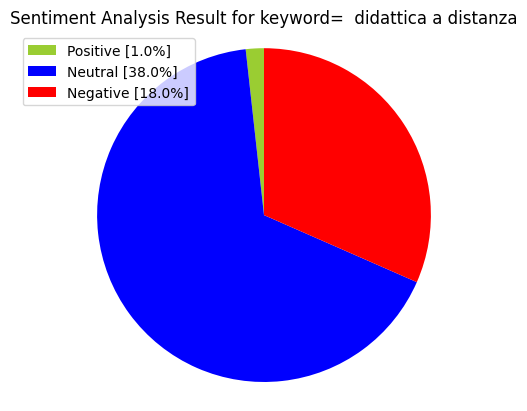

In [33]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [22]:
tweet_list.drop_duplicates(inplace = True)

In [23]:
tweet_list.shape

(36, 1)

In [36]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"Comunque dati alla mano, in un anno con la com...",comunque dati alla mano in un anno con la com...
1,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
2,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
3,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
4,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
5,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
6,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
7,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
8,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...
9,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...


In [37]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Comunque dati alla mano, in un anno con la com...",comunque dati alla mano in un anno con la com...,0.0,0.0,neutral,0.000,1.000,0.0,0.000
1,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
2,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
3,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
4,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
5,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
6,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
7,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
8,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
9,RT @blinkhbdl: la mia università essere tipo: ...,la mia universit essere tipo covid finito ...,0.0,0.0,negative,0.109,0.891,0.0,-0.296
